In [50]:
import numpy as np
import matplotlib.pyplot as plt
from docplex.mp.model import Model
import sys
import os

In [51]:
url = 'https://api-oaas.docloud.ibmcloud.com/job_manager/rest/v1/'
key = 'api_b1a57e9b-7c97-4b47-8cd7-5da66248224f'

In [52]:
r = np.random
r.seed(0)

In [53]:
n = 10
Q = 15
N = [i for i in range(1,n+1)]
V = [0] + N
q = {i:r.randint(1,10) for i in N} # node number

In [54]:
loc_x = r.rand(len(V))*200
loc_y = r.rand(len(V))*100

(-5.400620773366264, 202.17685236163723, 7.510546404632666, 102.17873040553707)

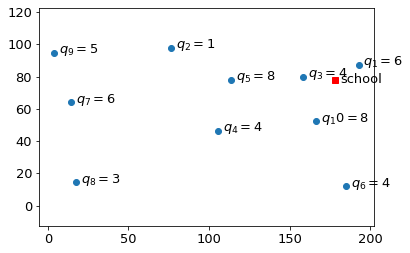

In [55]:
plt.scatter(loc_x[1:], loc_y[1:])
for i in N:
    plt.annotate('$q_{}={}$'.format(i,q[i]), (loc_x[i]+3,loc_y[i]))
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.annotate('school', (loc_x[0]+3,loc_y[0]-2))
plt.axis('equal')

In [56]:
A = [(i,j) for i in V for j in V if i!=j]
c = {(i,j):np.hypot(loc_x[i]-loc_x[j],loc_y[i]-loc_y[j]) for i,j in A}

In [57]:
mdl = Model('CVRP')

In [58]:
x = mdl.binary_var_dict(A, name='x')
u = mdl.continuous_var_dict(N, ub=Q, name='u')

In [59]:
mdl.minimize(mdl.sum(c[i,j]*x[i,j] for i,j in A))
mdl.add_constraints(mdl.sum(x[i,j] for j in V if j!=i)==1 for i in N)
mdl.add_constraints(mdl.sum(x[i,j] for i in V if i!=j)==1 for j in N)
mdl.add_indicator_constraints_(mdl.indicator_constraint(x[i,j],u[i]+q[j]==u[j])for i,j in A if i!=0 and j!=0)
mdl.add_constraints(u[i]>=q[i] for i in N)
solution = mdl.solve(log_output=True, url=url, key=key)

[2019-11-12T12:29:26Z, INFO] CPLEX version 12090000
[2019-11-12T12:29:26Z, INFO] Parameter file:
[2019-11-12T12:29:26Z, INFO] # -- This content is generated by DOcplex
[2019-11-12T12:29:26Z, INFO] CPLEX Parameter File Version 12.9.0.0
[2019-11-12T12:29:26Z, INFO] # --- end of generated prm data ---
[2019-11-12T12:29:26Z, WARN] Changed parameter CPX_PARAM_THREADS from 0 to 10
[2019-11-12T12:29:26Z, INFO] Param[1,067] = 10
[2019-11-12T12:29:26Z, INFO] Param[1,130] = utf-8
[2019-11-12T12:29:26Z, INFO] Param[1,132] = -1
[2019-11-12T12:29:26Z, INFO] CPXPARAM_Threads                                 10
[2019-11-12T12:29:26Z, INFO] CPXPARAM_Output_CloneLog                         -1
[2019-11-12T12:29:26Z, INFO] CPXPARAM_Read_APIEncoding                        "utf-8"
[2019-11-12T12:29:26Z, INFO] Found incumbent of value 1784.255531 after 0.00 sec. (0.01 ticks)
[2019-11-12T12:29:26Z, INFO] Tried aggregator 2 times.
[2019-11-12T12:29:26Z, INFO] MIP Presolve eliminated 10 rows and 2 columns.
[201

In [49]:
print(solution)

solution for: CVRP
objective: 819.302
x_0_1=1
x_0_4=1
x_0_6=1
x_0_8=1
x_1_3=1
x_2_0=1
x_3_0=1
x_4_5=1
x_5_0=1
x_6_10=1
x_7_9=1
x_8_7=1
x_9_2=1
x_10_0=1
u_1=11.000
u_2=15.000
u_3=15.000
u_4=4.000
u_5=12.000
u_6=7.000
u_7=9.000
u_8=3.000
u_9=14.000
u_10=15.000



In [13]:
active_arcs =[a for a in A if x[a].solution_value > 0.9]

In [14]:
solution.solve_status

<JobSolveStatus.OPTIMAL_SOLUTION: 2>

(-5.39312973393974, 202.16936132221073, 7.520866492932887, 102.16841031723685)

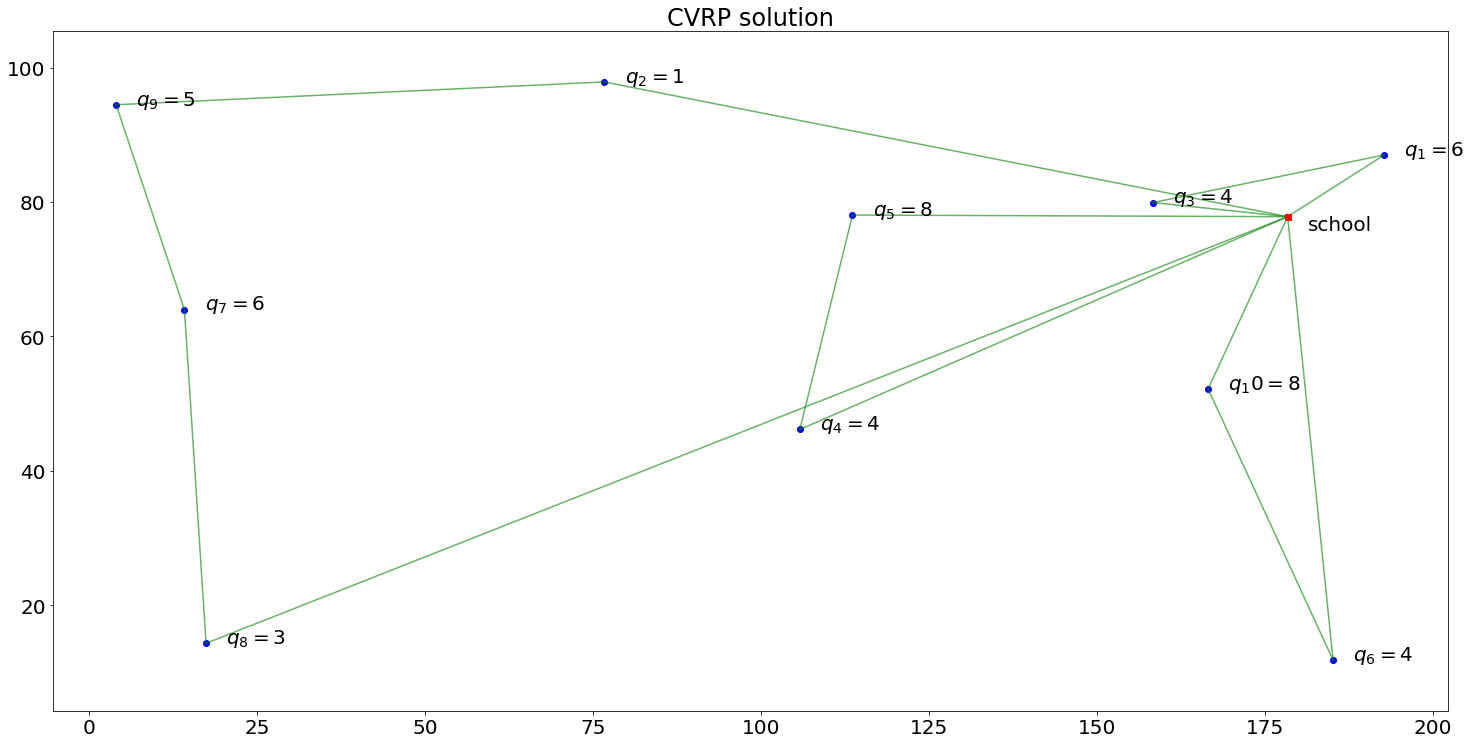

In [63]:
plt.figure(figsize=(25,12.5))
plt.rc('font', size=20)

plt.scatter(loc_x[1:], loc_y[1:], c='b')

for i in range(1,len(loc_x)):
    plt.annotate('$q_{}={}$'.format(i,q[i]), (loc_x[i]+3,loc_y[i]))
    
for i,j in active_arcs:
    plt.plot([loc_x[i],loc_x[j]], [loc_y[i],loc_y[j]], c='g', alpha=0.6)
    
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.annotate('school', (loc_x[0]+3,loc_y[0]-2))
plt.title("CVRP solution")
plt.axis('equal')